In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, NMF
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cross_decomposition import CCA

# Загрузка данных Wine
wine = datasets.load_wine()
X = wine.data
y = wine.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



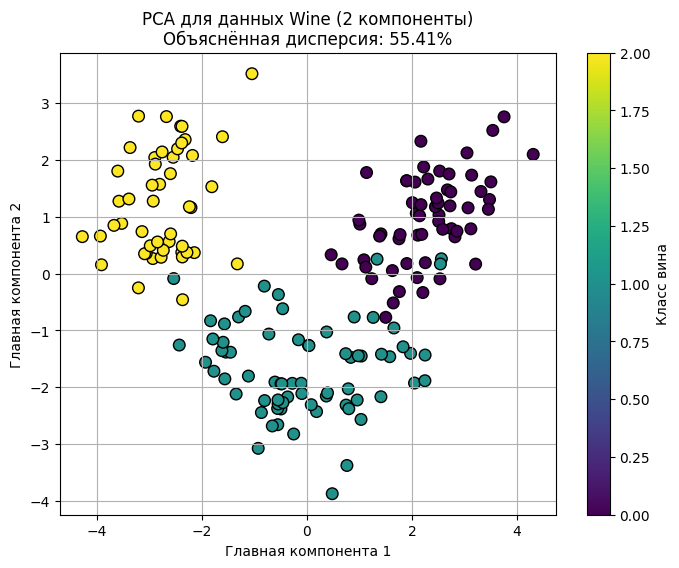

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Инициализируем PCA с 2 компонентами
pca_only = PCA(n_components=2)

# Применяем PCA к масштабированным данным
X_pca_only = pca_only.fit_transform(X_scaled)

# Визуализируем результат PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_only[:, 0], X_pca_only[:, 1], c=y, cmap='viridis', edgecolor='k', s=70)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title(f'PCA для данных Wine (2 компоненты)\nОбъяснённая дисперсия: {100 * sum(pca_only.explained_variance_ratio_):.2f}%')
plt.colorbar(label='Класс вина')
plt.grid(True)
plt.show()


In [3]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

# Инициализируем PCA с 3 компонентами
pca_3d = PCA(n_components=3)

# Применяем PCA к масштабированным данным
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Создаем DataFrame для Plotly
df_3d = pd.DataFrame(X_pca_3d, columns=['Главная Компонента 1', 'Главная Компонента 2', 'Главная Компонента 3'])
df_3d['Класс Вина'] = y

# Визуализируем результат PCA в 3D с помощью plotly.express
fig = px.scatter_3d(df_3d, x='Главная Компонента 1', y='Главная Компонента 2', z='Главная Компонента 3',
                    color='Класс Вина', title=f'PCA для данных Wine (3 компоненты)\nОбъяснённая дисперсия: {100 * sum(pca_3d.explained_variance_ratio_):.2f}%')
fig.show()

print(f"При использовании 3 главных компонент, общая объясненная дисперсия составляет: {100 * sum(pca_3d.explained_variance_ratio_):.2f}%")
print("Это означает, что эти три компоненты сохраняют указанный процент всей изменчивости, присутствовавшей в исходных данных. На трехмерном графике можно лучше рассмотреть разделение классов вин в уменьшенном пространстве.")

При использовании 3 главных компонент, общая объясненная дисперсия составляет: 66.53%
Это означает, что эти три компоненты сохраняют указанный процент всей изменчивости, присутствовавшей в исходных данных. На трехмерном графике можно лучше рассмотреть разделение классов вин в уменьшенном пространстве.


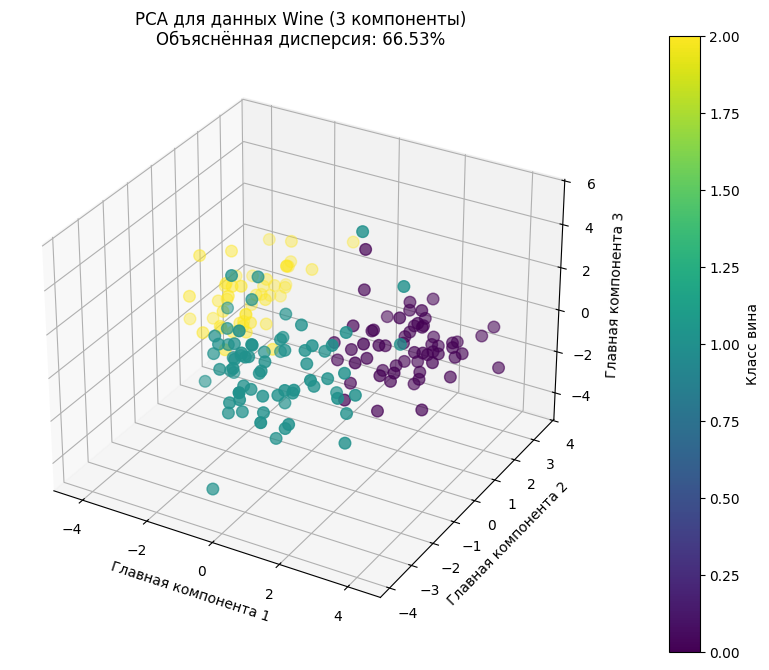

При использовании 3 главных компонент, общая объясненная дисперсия составляет: 66.53%
На этом 3D графике, построенном с помощью Matplotlib, можно наблюдать пространственное распределение данных после уменьшения размерности. Хотя он менее интерактивен, чем Plotly, он по-прежнему позволяет оценить кластеры и разделение классов в трехмерном пространстве главных компонент. Эти три компоненты объясняют значительную часть общей изменчивости в данных.


In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Инициализируем PCA с 3 компонентами
pca_3d_mpl = PCA(n_components=3)

# Применяем PCA к масштабированным данным
X_pca_3d_mpl = pca_3d_mpl.fit_transform(X_scaled)

# Создаем 3D-график
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Визуализируем результат PCA в 3D с помощью Matplotlib
scatter = ax.scatter(X_pca_3d_mpl[:, 0], X_pca_3d_mpl[:, 1], X_pca_3d_mpl[:, 2],
                     c=y, cmap='viridis', s=70)

ax.set_xlabel('Главная компонента 1')
ax.set_ylabel('Главная компонента 2')
ax.set_zlabel('Главная компонента 3')
ax.set_title(f'PCA для данных Wine (3 компоненты)\nОбъяснённая дисперсия: {100 * sum(pca_3d_mpl.explained_variance_ratio_):.2f}%')

# Добавляем цветовую легенду (colorbar)
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Класс вина')

plt.show()

print(f"При использовании 3 главных компонент, общая объясненная дисперсия составляет: {100 * sum(pca_3d_mpl.explained_variance_ratio_):.2f}%")
print("На этом 3D графике, построенном с помощью Matplotlib, можно наблюдать пространственное распределение данных после уменьшения размерности. Хотя он менее интерактивен, чем Plotly, он по-прежнему позволяет оценить кластеры и разделение классов в трехмерном пространстве главных компонент. Эти три компоненты объясняют значительную часть общей изменчивости в данных.")

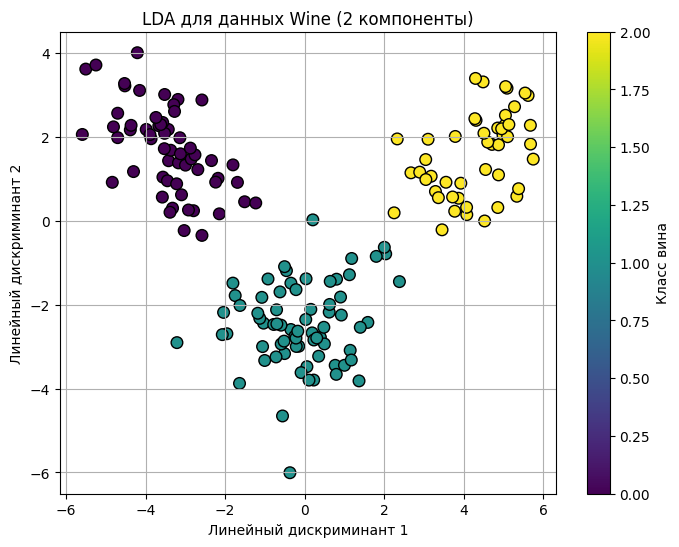

Линейный дискриминантный анализ (LDA) был успешно применен к набору данных Wine.
В отличие от PCA, который ищет направления с максимальной дисперсией, LDA ищет направления, которые наилучшим образом разделяют классы. На этом графике можно наблюдать, как данные проецируются на два линейных дискриминанта, что часто приводит к более четкому разделению классов по сравнению с PCA, особенно когда классы хорошо определены в исходном пространстве.


In [9]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Инициализируем LDA
# Для LDA максимальное количество компонент равно min(n_features, n_classes - 1)
# В данном случае n_classes = 3, поэтому n_components = 2.
n_classes_lda = len(set(y))
lda_components = min(2, n_classes_lda - 1)
lda = LinearDiscriminantAnalysis(n_components=lda_components)

# Применяем LDA к исходным данным X и целевой переменной y
# LDA является контролируемым методом, поэтому ему нужен y
X_lda = lda.fit_transform(X, y)

# Визуализируем результат LDA
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', edgecolor='k', s=70)
plt.xlabel('Линейный дискриминант 1')
plt.ylabel('Линейный дискриминант 2')
plt.title('LDA для данных Wine (2 компоненты)')
plt.colorbar(label='Класс вина')
plt.grid(True)
plt.show()

print("Линейный дискриминантный анализ (LDA) был успешно применен к набору данных Wine.")
print("В отличие от PCA, который ищет направления с максимальной дисперсией, LDA ищет направления, которые наилучшим образом разделяют классы. На этом графике можно наблюдать, как данные проецируются на два линейных дискриминанта, что часто приводит к более четкому разделению классов по сравнению с PCA, особенно когда классы хорошо определены в исходном пространстве.")

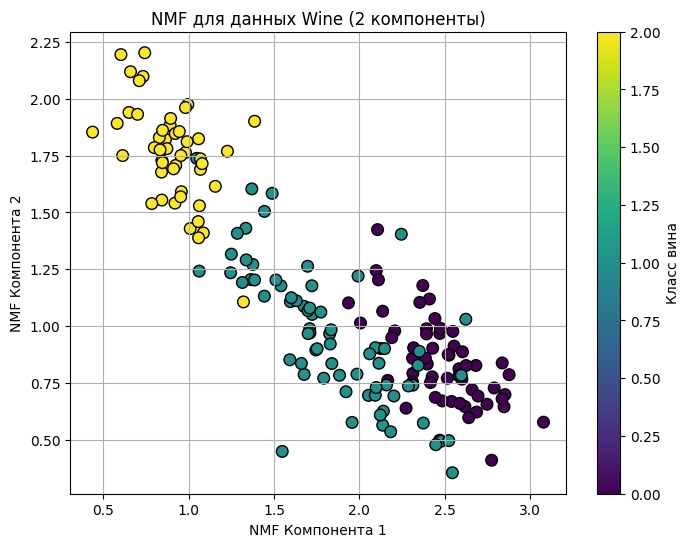

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

# NMF требует неотрицательных данных. X_scaled может содержать отрицательные значения.
# Сделаем данные неотрицательными, сдвинув их так, чтобы минимальное значение было больше нуля.
X_nonneg_nmf = X_scaled - X_scaled.min() + 0.1

# Инициализируем NMF с 2 компонентами
nmf_only = NMF(n_components=2, init='random', random_state=42, max_iter=200)

# Применяем NMF к неотрицательным данным
X_nmf_only = nmf_only.fit_transform(X_nonneg_nmf)

# Визуализируем результат NMF
plt.figure(figsize=(8, 6))
plt.scatter(X_nmf_only[:, 0], X_nmf_only[:, 1], c=y, cmap='viridis', edgecolor='k', s=70)
plt.xlabel('NMF Компонента 1')
plt.ylabel('NMF Компонента 2')
plt.title('NMF для данных Wine (2 компоненты)')
plt.colorbar(label='Класс вина')
plt.grid(True)
plt.show()

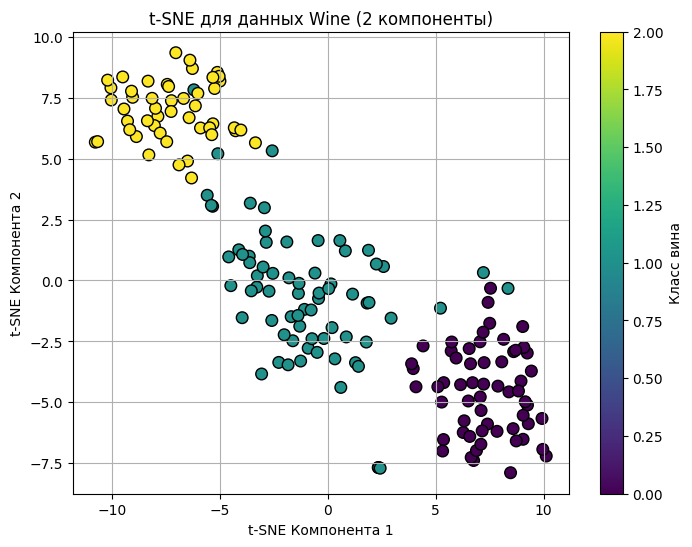

In [15]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Инициализируем t-SNE с 2 компонентами
# Важно: t-SNE чувствителен к масштабу данных и часто лучше работает после PCA
# 'perplexity' - один из ключевых параметров, отражает количество 'ближайших соседей'
# 'n_iter' было переименовано в 'max_iter' в версии 1.5, используем 'max_iter' для будущей совместимости
# 'random_state' для воспроизводимости результатов
tsne = TSNE(n_components=2, perplexity=30, max_iter=300, random_state=42)

# Применяем t-SNE к масштабированным данным
X_tsne = tsne.fit_transform(X_scaled)

# Визуализируем результат t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k', s=70)
plt.xlabel('t-SNE Компонента 1')
plt.ylabel('t-SNE Компонента 2')
plt.title('t-SNE для данных Wine (2 компоненты)')
plt.colorbar(label='Класс вина')
plt.grid(True)
plt.show()

t-SNE (t-distributed Stochastic Neighbor Embedding) был успешно применен к набору данных Wine, уменьшив его размерность до двух компонент. Основная цель t-SNE — визуализация многомерных данных таким образом, чтобы точки, которые близки друг к другу в исходном высокоразмерном пространстве, оставались близкими и в низкоразмерном пространстве. При этом точки, которые находятся далеко друг от друга, также остаются далекими.

На графике вы можете наблюдать, как t-SNE старается разделить классы, формируя отдельные кластеры. Часто t-SNE показывает более четкое разделение кластеров по сравнению с линейными методами, такими как PCA или LDA, поскольку он ориентирован на сохранение локальных структур данных, что делает его отличным инструментом для визуального анализа сложных данных.

In [17]:
import plotly.express as px
import pandas as pd
from sklearn.manifold import TSNE

# Инициализируем t-SNE с 3 компонентами
# 'perplexity' - один из ключевых параметров, отражает количество 'ближайших соседей'
# 'max_iter' - количество итераций для оптимизации
# 'random_state' для воспроизводимости результатов
tsne_3d = TSNE(n_components=3, perplexity=30, max_iter=300, random_state=42)

# Применяем t-SNE к масштабированным данным
X_tsne_3d = tsne_3d.fit_transform(X_scaled)

# Создаем DataFrame для Plotly
df_tsne_3d = pd.DataFrame(X_tsne_3d, columns=['t-SNE Компонента 1', 't-SNE Компонента 2', 't-SNE Компонента 3'])
df_tsne_3d['Класс Вина'] = y

# Визуализируем результат t-SNE в 3D с помощью plotly.express
fig = px.scatter_3d(df_tsne_3d, x='t-SNE Компонента 1', y='t-SNE Компонента 2', z='t-SNE Компонента 3',
                    color='Класс Вина', title='t-SNE для данных Wine (3 компоненты)')
fig.show()

In [19]:
!pip install umap-learn

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



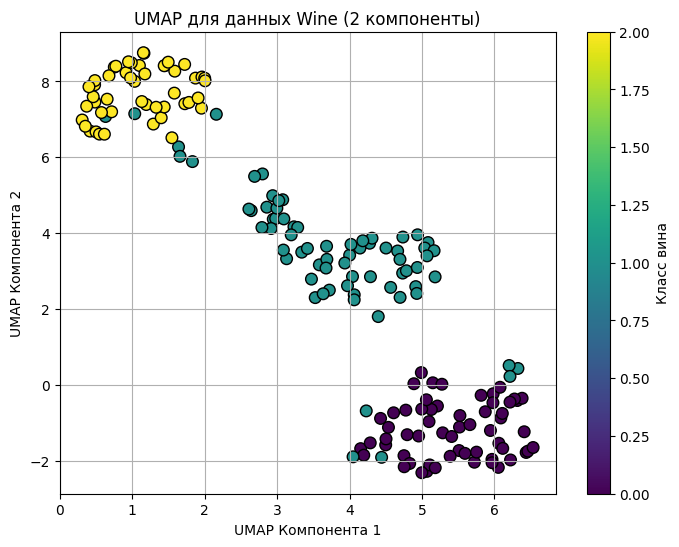

In [20]:
import matplotlib.pyplot as plt
import umap

# Инициализируем UMAP с 2 компонентами
# random_state для воспроизводимости результатов
umap_reducer = umap.UMAP(n_components=2, random_state=42)

# Применяем UMAP к масштабированным данным
X_umap = umap_reducer.fit_transform(X_scaled)

# Визуализируем результат UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', edgecolor='k', s=70)
plt.xlabel('UMAP Компонента 1')
plt.ylabel('UMAP Компонента 2')
plt.title('UMAP для данных Wine (2 компоненты)')
plt.colorbar(label='Класс вина')
plt.grid(True)
plt.show()

UMAP (Uniform Manifold Approximation and Projection) был успешно применен к набору данных Wine, уменьшив его размерность до двух компонент. UMAP — это современный алгоритм снижения размерности, который, подобно t-SNE, хорошо подходит для визуализации высокоразмерных данных, поскольку он эффективно сохраняет как локальные, так и глобальные структуры данных. Однако UMAP часто быстрее t-SNE и лучше масштабируется для больших наборов данных.

На графике вы можете наблюдать, как UMAP формирует четко разделенные кластеры, что делает его отличным инструментом для визуального анализа структуры данных и обнаружения групп.

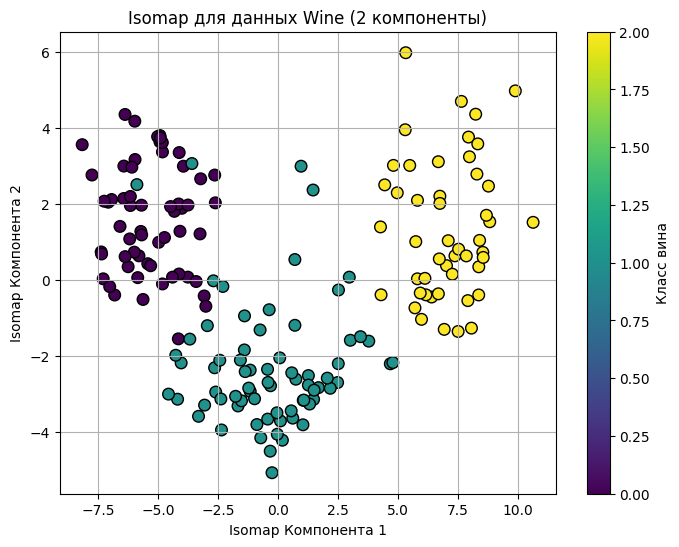

In [22]:
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap

# Инициализируем Isomap с 2 компонентами
# n_neighbors - ключевой параметр, влияет на построение графа соседей
isomap = Isomap(n_components=2, n_neighbors=10)

# Применяем Isomap к масштабированным данным
X_isomap = isomap.fit_transform(X_scaled)

# Визуализируем результат Isomap
plt.figure(figsize=(8, 6))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y, cmap='viridis', edgecolor='k', s=70)
plt.xlabel('Isomap Компонента 1')
plt.ylabel('Isomap Компонента 2')
plt.title('Isomap для данных Wine (2 компоненты)')
plt.colorbar(label='Класс вина')
plt.grid(True)
plt.show()